___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 3<br><br>Regression with ANN (Dummy Version for Month)<br><br>KC House Data<br><h1>

# Keras Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
!pip install folium 

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv("kc_house_data.csv")

In [5]:
#from matplotlib import style
#style.use('dark_background')

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.isnull().sum().any()

False

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### İd_number

In [10]:
df = df.drop('id', axis = 1)

### price

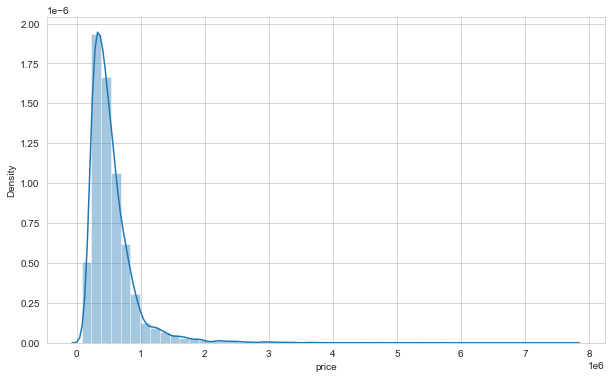

In [11]:
sns.distplot(df['price']);

In [12]:
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [13]:
df.groupby("waterfront").mean().T

waterfront,0,1
price,531762.324,1662524.184
bedrooms,3.374,3.301
bathrooms,2.112,2.678
sqft_living,2072.007,3173.687
sqft_lot,15021.290,25371.828
floors,1.493,1.641
view,0.207,3.767
condition,3.409,3.534
grade,7.649,8.773
sqft_above,1783.392,2473.043


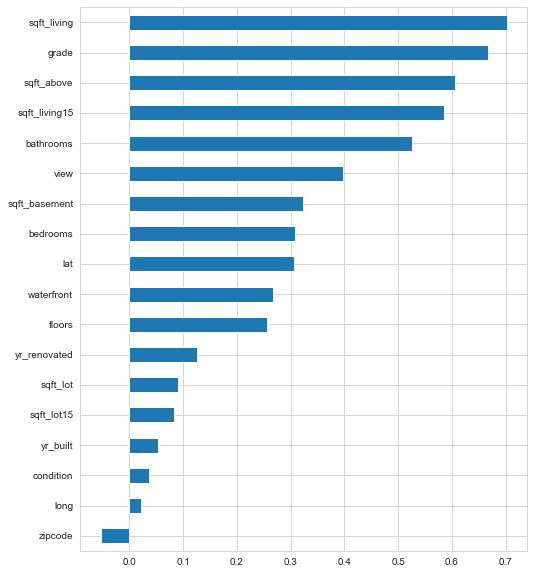

In [14]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh");

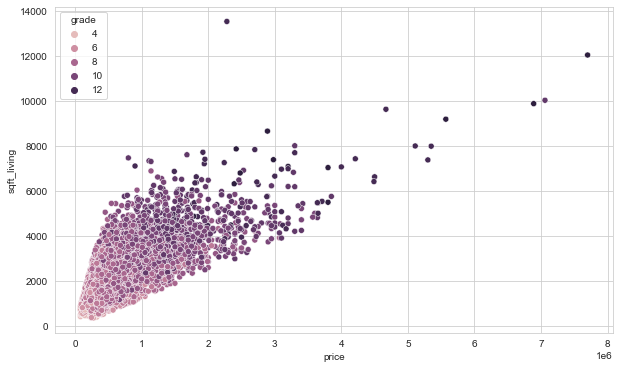

In [15]:
sns.scatterplot(x = 'price',y = 'sqft_living', data = df, hue = "grade");

### bedrooms

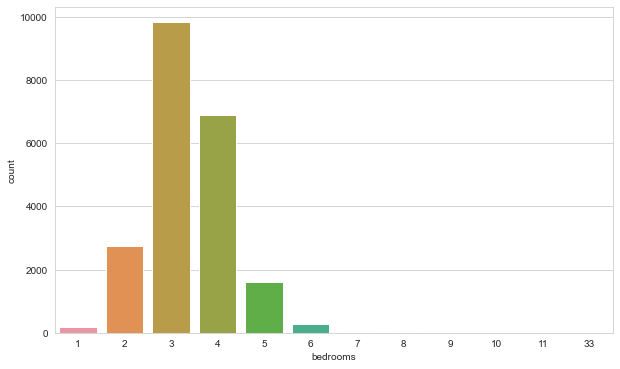

In [16]:
sns.countplot(df['bedrooms']);

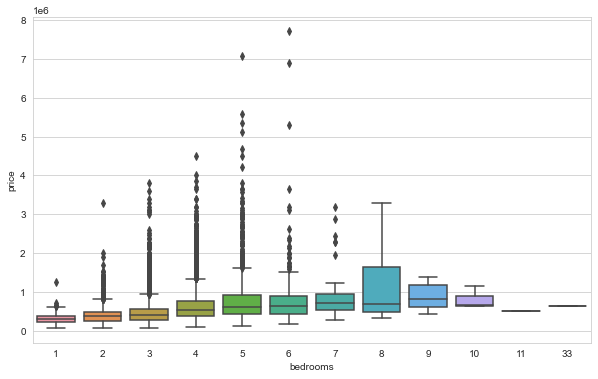

In [17]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df);

In [18]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [19]:
df = df[df["bedrooms"] != 33]

Most likely the data was entered incorrectly.

In [20]:
df.shape

(21596, 20)

### date

In [21]:
df['date'].dtype

dtype('O')

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [24]:
df['year'] = df['date'].dt.year
#df['year'] = df['date'].apply(lambda date : date.year)

In [25]:
df['month'] = df['date'].dt.month

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


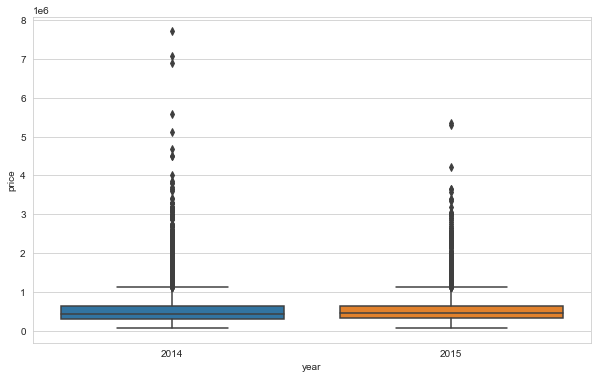

In [27]:
sns.boxplot(x = 'year', y = 'price', data = df);

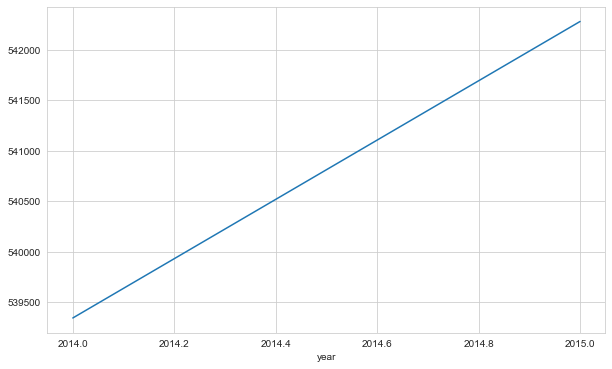

In [28]:
df.groupby('year')['price'].mean().plot();

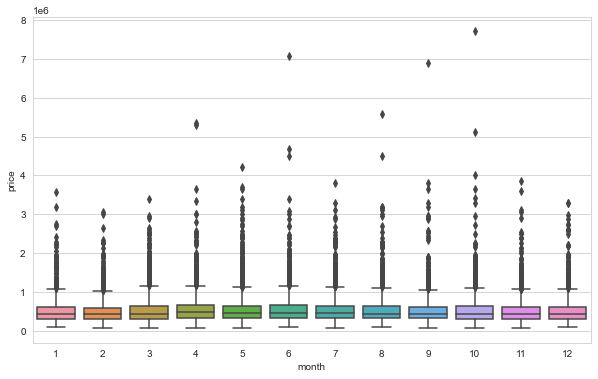

In [29]:
sns.boxplot(x = 'month', y = 'price', data = df);

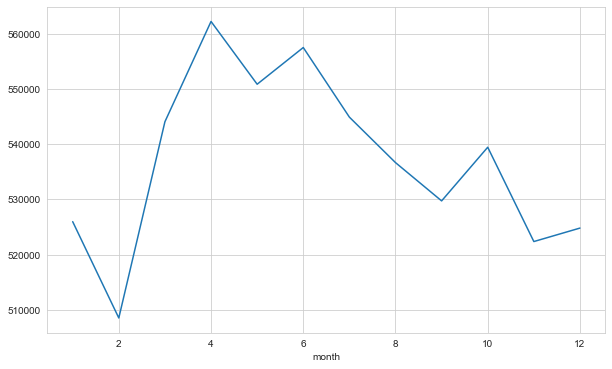

In [30]:
df.groupby('month')['price'].mean().plot();

In [31]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,0,0,0,0,0,0,0,0,0,1,0,0
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,0,0,0,0,0,0,0,0,0,0,0,1
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
df = df.drop(['date', "year", "month"], axis = 1)

### zipcode

In [33]:
df['zipcode'].value_counts(dropna = False)

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

we can categorize the zipcodes as north, south, west, east, middle by regions. But it can be made manually and taken many time and we need domain knowladge to do that. So we will drop this column.

In [34]:
df = df.drop('zipcode', axis = 1)

### yr_renovated & yr_built

In [35]:
df['yr_renovated'].value_counts(dropna = False)

0       20682
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
df['yr_built'].value_counts(dropna = False)

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

could make sense due to scaling, higher should correlate to more value

In [ ]:
# df["yr_renovated"].replace(0, np.nan, inplace = True)
# df["yr_renovated"].fillna(df["yr_built"], inplace = True)
# df.drop("yr_built", axis = 1, inplace = True)

In [ ]:
# df["yr_renovated"].replace(0, np.nan, inplace = True)
# df["yr_renovated"].fillna(df["yr_built"], inplace = True)
# df["new_age"] = 2021 - df["yr_renovated"]
# df.drop(["yr_renovated", "yr_built"], axis = 1, inplace = True)

### sqft_basement

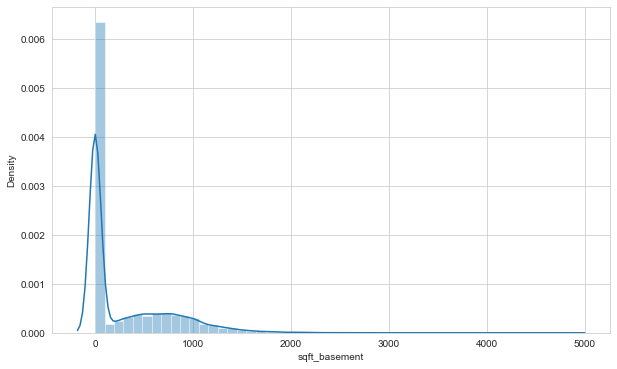

In [37]:
sns.distplot(df['sqft_basement']);

In [38]:
df['sqft_basement'].value_counts(dropna = False)

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [39]:
df[df["sqft_basement"] > 3000].sort_values(by="sqft_basement", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
8085,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,47.557,-122.210,3270,10454,0,0,0,0,0,1,0,0,0,0,0,0
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,1999,0,47.667,-121.986,4850,217800,0,0,0,0,1,0,0,0,0,0,0,0
15468,3200000.000,4,3.250,7000,28206,1.000,1,4,4,12,3500,3500,1991,0,47.593,-122.086,4913,14663,0,0,0,0,0,0,0,1,0,0,0,0
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
10074,1900000.000,5,4.250,6510,16471,2.000,0,3,4,11,3250,3260,1980,0,47.576,-122.242,4480,16471,0,0,0,0,0,0,0,0,1,0,0,0


could make sense due to scaling, higher should correlate to more value

### sqft_above

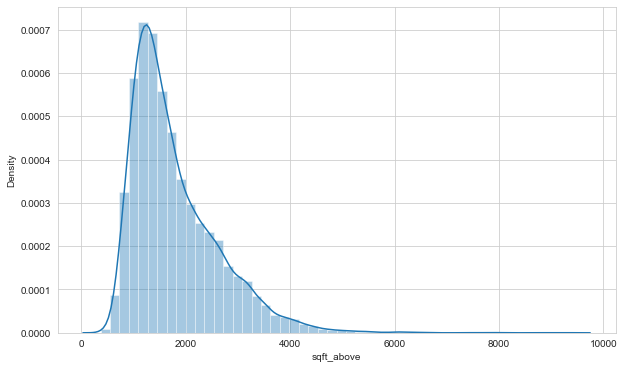

In [40]:
sns.distplot(df['sqft_above']);

In [41]:
df['sqft_above'].value_counts(dropna = False)

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2198      1
6420      1
2406      1
2502      1
2031      1
Name: sqft_above, Length: 942, dtype: int64

In [42]:
df[df["sqft_above"] > 6000].sort_values(by="sqft_above", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,1999,0,47.667,-121.986,4850,217800,0,0,0,0,1,0,0,0,0,0,0,0
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,47.630,-122.240,4540,42730,0,0,0,0,0,0,0,0,1,0,0,0
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
18288,3300000.000,5,6.250,8020,21738,2.000,0,0,3,11,8020,0,2001,0,47.568,-122.189,4160,18969,0,0,0,0,0,0,1,0,0,0,0,0
13398,2420000.000,5,4.750,7880,24250,2.000,0,2,3,13,7880,0,1996,0,47.733,-122.362,2740,10761,1,0,0,0,0,0,0,0,0,0,0,0
19842,2700000.000,4,4.000,7850,89651,2.000,0,0,3,12,7850,0,2006,0,47.541,-121.982,6210,95832,1,0,0,0,0,0,0,0,0,0,0,0
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,47.650,-122.214,3930,25449,0,0,0,0,0,1,0,0,0,0,0,0
11859,1950000.000,4,3.250,7420,167869,2.000,0,3,3,12,7420,0,2002,0,47.455,-121.764,5610,169549,1,0,0,0,0,0,0,0,0,0,0,0
18579,1140000.000,5,4.000,7320,217800,2.000,0,0,3,11,7320,0,1992,0,47.447,-122.086,3270,34500,0,0,0,0,0,0,1,0,0,0,0,0
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,47.623,-122.220,4600,21750,0,0,0,1,0,0,0,0,0,0,0,0


### Geographical Properties

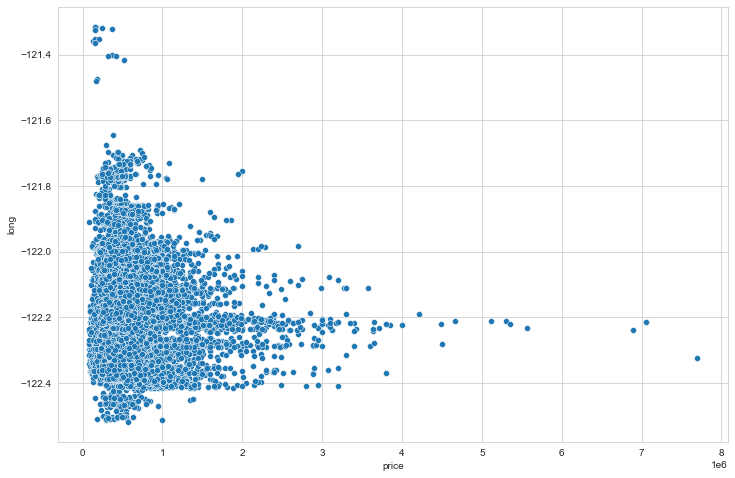

In [43]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'price', y = 'long', data = df);

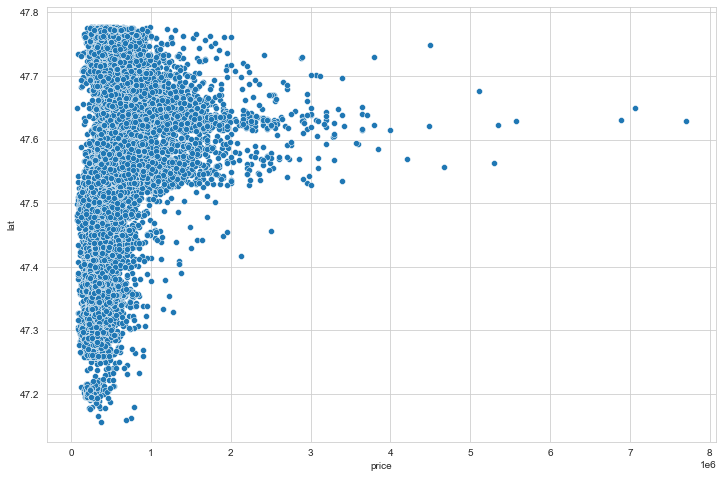

In [44]:
plt.figure(figsize  = (12, 8))
sns.scatterplot(x = 'price', y = 'lat', data = df);

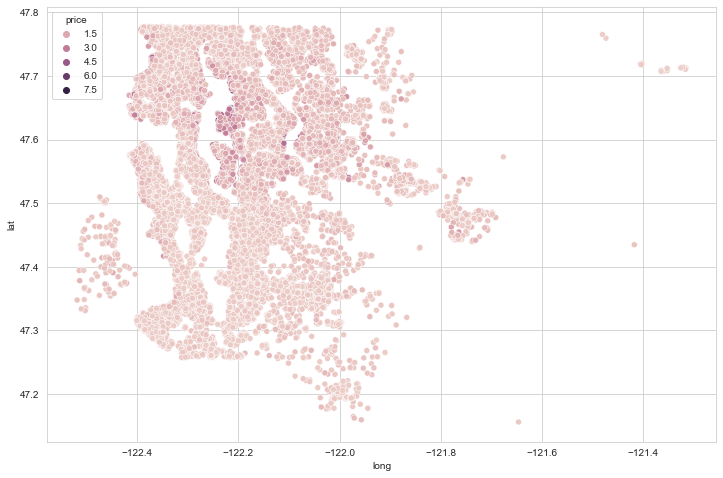

In [45]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price');

In [46]:
len(df) * (0.01)

215.96

In [47]:
df.sort_values('price', ascending = False).head(216)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,47.630,-122.323,3940,8800,0,0,0,0,0,0,0,0,0,1,0,0
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,47.650,-122.214,3930,25449,0,0,0,0,0,1,0,0,0,0,0,0
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,47.630,-122.240,4540,42730,0,0,0,0,0,0,0,0,1,0,0,0
4407,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,47.629,-122.233,3560,24345,0,0,0,0,0,0,0,1,0,0,0,0
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,47.623,-122.220,4600,21750,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,1980000.000,6,4.500,4800,9097,2.000,0,0,3,10,3580,1220,2007,0,47.626,-122.291,2180,6037,0,0,0,0,0,0,1,0,0,0,0,0
16511,1980000.000,4,3.500,4500,44384,1.000,0,0,3,12,3340,1160,1990,0,47.632,-122.192,2540,26287,0,1,0,0,0,0,0,0,0,0,0,0
19513,1980000.000,4,4.000,4360,12081,2.000,0,0,3,10,4360,0,2007,0,47.638,-122.219,2180,10800,0,0,0,0,0,0,0,1,0,0,0,0
3278,1970000.000,5,3.750,3940,13738,1.500,0,3,4,9,3940,0,1951,0,47.620,-122.212,2370,13320,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
non_top_1_perc = df.sort_values('price', ascending = False).iloc[216:]

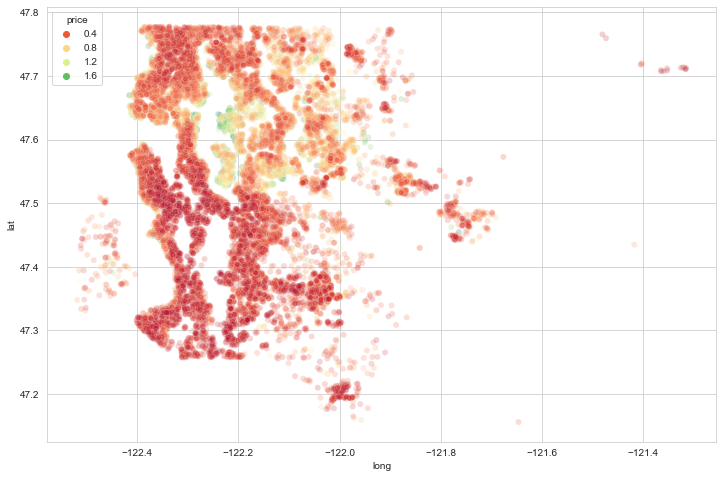

In [51]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_perc, hue = 'price',
                palette = 'RdYlGn', alpha = 0.2);

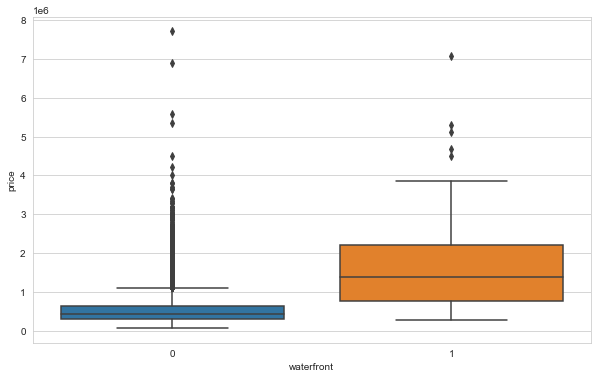

In [52]:
sns.boxplot(x = 'waterfront', y = 'price', data = df);

In [53]:
import folium
folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

ModuleNotFoundError: No module named 'folium'

In [ ]:
map_kc = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start = 10) # location=[47.511,  -122.257]
for lat, lng in zip(df['lat'], df['long']):
    folium.CircleMarker(
        [lat, lng],
        radius = 1,
        color = 'blue',
        fill = False ,
        fill_color ='#3186CC',
        fill_opacity = 0.3).add_to(map_kc)
map_kc

### latest data

In [ ]:
df.head()

In [ ]:
df.shape

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
X_train.shape

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.weights

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

In [ ]:
model.summary()

In [ ]:
model.weights

In [ ]:
pd.DataFrame(model.history.history)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

### learning_rate

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
model.weights

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

### EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(29, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

## Saving Final Model and Scaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(29, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(29, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
#early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 1000,
         # callbacks = [early_stop]
         )

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

In [ ]:
model.save('model_kc_house.h5')  # creates a HDF5 file 'my_model.h5'

## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_kc_house = load_model('model_kc_house.h5')
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [ ]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

In [ ]:
single_house = scaler_kc_house.transform(single_house)
single_house

In [ ]:
model_kc_house.predict(single_house)

In [ ]:
df.iloc[0][0]

## Comparison with ML

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state = seed)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___